# Gutenberg Books classification

## Overall
The goal of this project is to classify books by its title, compare the different models we used; analyze each one and come out the best model which is most efficient in this problem.

## The dataset:

1. We scrapped 5 books with different authors and with the same genre (Philosophy genre):

    * The Art of War,

    * Beyond Good and Evil,

    * The Psychology and Pedagogy of Anger,

    * The Republic,

    * Meditations

2. Created 200 partitions of each book text, each partition contains 100 words.

    We come out with a DataFrame contains:

    • Partitions columns,

    • The title of the book column,

    • Author column.

In [1]:
import requests 
from bs4 import BeautifulSoup 

In [2]:
# A function to scrap the books from the website
def get_book(urls):
  data = []
  for url in urls:
    r = requests.get(url) # Make the request
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, 'html.parser') 
    data.append({
      'Title': soup.title.string,
      'Text': soup.get_text()
      }
  )
  return data


In [3]:
# Store urls
u1= 'https://www.gutenberg.org/files/132/132-h/132-h.htm'
u2= 'https://www.gutenberg.org/files/4363/4363-h/4363-h.htm'
u3= 'https://www.gutenberg.org/files/59183/59183-h/59183-h.htm'
u4= 'https://www.gutenberg.org/files/1497/1497-h/1497-h.htm'
u5= 'https://www.gutenberg.org/files/2680/2680-h/2680-h.htm'


b = get_book([u1,u2, u3,u4,u5])


In [4]:
print(b)

[{'Title': 'The Project Gutenberg eBook of The Art of War, by Sun Tzu', 'Text': '\n\n\n\n\nThe Project Gutenberg eBook of The Art of War, by Sun Tzu\n\n\n\nThe Project Gutenberg eBook of The Art of War, by Sun TzÅ\xad\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online\r\nat www.gutenberg.org. If you\r\nare not located in the United States, you will have to check the laws of the\r\ncountry where you are located before using this eBook.\r\n\nTitle: The Art of War\nAuthor: Sun TzÅ\xad\nTranslator: Lionel Giles\nRelease Date: May 1994 [eBook #132]\r\n[Most recently updated: October 16, 2021]\nLanguage: English\nCharacter set encoding: UTF-8\n*** START OF THE PROJECT GUTENBERG EBOOK THE ART OF WAR ***\nSun TzÅ\xad\r\non\r\nThe Art of War\nTHE OLDEST 

In [5]:
#Print the first book title
print(b[0]["Title"])

The Project Gutenberg eBook of The Art of War, by Sun Tzu


In [6]:
#Print the first book text
print(b[0]["Text"])






The Project Gutenberg eBook of The Art of War, by Sun Tzu



The Project Gutenberg eBook of The Art of War, by Sun TzÅ­

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online
at www.gutenberg.org. If you
are not located in the United States, you will have to check the laws of the
country where you are located before using this eBook.

Title: The Art of War
Author: Sun TzÅ­
Translator: Lionel Giles
Release Date: May 1994 [eBook #132]
[Most recently updated: October 16, 2021]
Language: English
Character set encoding: UTF-8
*** START OF THE PROJECT GUTENBERG EBOOK THE ART OF WAR ***
Sun TzÅ­
on
The Art of War
THE OLDEST MILITARY TREATISE IN THE WORLD
Translated from the Chinese with Introduction and Critical Notes
BY
LIONEL GILES, M.A.

Assistant in the Depart

In [7]:
#Print the second book title
print(b[1]["Title"])


      Beyond Good and Evil, by Friedrich Nietzsche
    


In [8]:
#Print the second book text
print(b[1]["Text"])






      Beyond Good and Evil, by Friedrich Nietzsche
    





The Project Gutenberg EBook of Beyond Good and Evil, by Friedrich Nietzsche

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Beyond Good and Evil

Author: Friedrich Nietzsche

Translator: Helen Zimmern

Release Date: December 7, 2009 [EBook #4363]
Last Updated: February 4, 2013

Language: English

Character set encoding: ASCII

*** START OF THIS PROJECT GUTENBERG EBOOK BEYOND GOOD AND EVIL ***




Produced by John Mamoun, Charles Franks, David Widger and the Online
Distributed Proofreading Team











      BEYOND GOOD AND EVIL
    




      By Friedrich Nietzsche
    




      Translated by Helen Zimmern
    




      TRANSCRIBER'S NOTE ABOUT THIS E-TEXT EDITION:
      
        The following is a reprint of

In [9]:
# convert the data of the books to csv file using pandas using to_df function
import pandas as pd

def to_df(books): 
  df = pd.DataFrame.from_dict(books) 
  df.to_csv (r'test8.csv', index = False, header=True)

  return df


In [10]:
df = to_df(b)
df

Title  \
0  The Project Gutenberg eBook of The Art of War,...   
1  \n      Beyond Good and Evil, by Friedrich Nie...   
2  The Project Gutenberg eBook of The Psychology ...   
3  The Project Gutenberg eBook of The Republic, b...   
4  The Project Gutenberg eBook of Meditations, by...   

                                                Text  
0  \n\n\n\n\nThe Project Gutenberg eBook of The A...  
1  \n\n\n\n\n      Beyond Good and Evil, by Fried...  
2  \n\n\n\nThe Project Gutenberg eBook of The Psy...  
3  \n\n\n\n\nThe Project Gutenberg eBook of The R...  
4  \n\n\n\n\nThe Project Gutenberg eBook of Medit...

In [11]:
# print the length of the first book  
len(df.Text[0])

339671

In [12]:
# print the length of the second book  
len(df.Text[1])

436007

In [13]:
def split_author(df):
  author = []
  title = []
  for i in range(len(df.Title)):
      author.append(df.Title.str.split("by ")[i][1])
      title.append(df.Title.str.split("by ")[i][0])
  df['Author'] = author
  df['Title'] = title

In [14]:
split_author(df)

In [15]:
df

Title  \
0    The Project Gutenberg eBook of The Art of War,    
1                     \n      Beyond Good and Evil,    
2  The Project Gutenberg eBook of The Psychology ...   
3      The Project Gutenberg eBook of The Republic,    
4       The Project Gutenberg eBook of Meditations,    

                                                Text  \
0  \n\n\n\n\nThe Project Gutenberg eBook of The A...   
1  \n\n\n\n\n      Beyond Good and Evil, by Fried...   
2  \n\n\n\nThe Project Gutenberg eBook of The Psy...   
3  \n\n\n\n\nThe Project Gutenberg eBook of The R...   
4  \n\n\n\n\nThe Project Gutenberg eBook of Medit...   

                      Author  
0                    Sun Tzu  
1  Friedrich Nietzsche\n      
2    Roy Franklin Richardson  
3                      Plato  
4            Marcus Aurelius

## Data preprocessing

• Converted the text to lower case.

• Removed any special characters.

• Used RegexpTokenizer to tokenize the text.

• Created our stop words list and removed from our text.

• Remove single char, and chars with size 2.

In [16]:
# Convert text to lower case to make it east to search for words
def to_lower(data):
    data = [word.lower() for word in data]
    return data

df['Text'] = to_lower(df['Text'])

In [17]:
# Remove Numbers and tokenize the text into words
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[^\d\W]+')
df['cleaned'] = [tokenizer.tokenize(item) for item in df['Text']]

In [18]:
df['cleaned']

0    [the, project, gutenberg, ebook, of, the, art,...
1    [beyond, good, and, evil, by, friedrich, nietz...
2    [the, project, gutenberg, ebook, of, the, psyc...
3    [the, project, gutenberg, ebook, of, the, repu...
4    [the, project, gutenberg, ebook, of, meditatio...
Name: cleaned, dtype: object

In [19]:
stop = ["i","me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 'text-align:', "justify;" ,'text-justify:',"font-weight:",'margin-top:', 'text-indent:','margin-bottom:','margin-left:','margin-right:','text-align:',"yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "ebook","font","project" ,"size", "small", "align", "text","position", "border", "solid", "position","75em","left","right","bottom", "center","body","up", "chapter", "projec","auto","vertical","gutenberg","text","align" ,"margin","weight","indent","width", "break","style","page","line","height","spacing","normal","same", "so", "could", "could", "justify","have", "has","than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [20]:
df['cleaned'][0]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'art',
 'of',
 'war',
 'by',
 'sun',
 'tzu',
 'the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'art',
 'of',
 'war',
 'by',
 'sun',
 'tzå',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'will',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 '

In [21]:
df['cleaned']  = df['cleaned'].apply(lambda x: ([word for word in x if word not in (stop)]))

In [22]:
df['cleaned']

0    [art, war, sun, tzu, art, war, sun, tzå, use, ...
1    [beyond, good, evil, friedrich, nietzsche, bey...
2    [psychology, pedagogy, anger, roy, franklin, r...
3    [republic, plato, republic, plato, use, anyone...
4    [meditations, marcus, aurelius, meditations, m...
Name: cleaned, dtype: object

### Remove single char, and char with size 2

In [23]:
def notT(text):
    text = text.apply(lambda x: [item for item in x if len(item)>3])
    return text
df['cleaned']= notT(df['cleaned'])


In [24]:
df

Title  \
0    The Project Gutenberg eBook of The Art of War,    
1                     \n      Beyond Good and Evil,    
2  The Project Gutenberg eBook of The Psychology ...   
3      The Project Gutenberg eBook of The Republic,    
4       The Project Gutenberg eBook of Meditations,    

                                                Text  \
0  \n\n\n\n\nthe project gutenberg ebook of the a...   
1  \n\n\n\n\n      beyond good and evil, by fried...   
2  \n\n\n\nthe project gutenberg ebook of the psy...   
3  \n\n\n\n\nthe project gutenberg ebook of the r...   
4  \n\n\n\n\nthe project gutenberg ebook of medit...   

                      Author  \
0                    Sun Tzu   
1  Friedrich Nietzsche\n       
2    Roy Franklin Richardson   
3                      Plato   
4            Marcus Aurelius   

                                             cleaned  
0  [anyone, anywhere, united, states, parts, worl...  
1  [beyond, good, evil, friedrich, nietzsche, bey...  
2  [psychology, pedagogy, anger, franklin, richar...  
3  [republic, plato, republic, plato, anyone, any...  
4  [meditations, marcus, aurelius, meditations, m...

In [25]:
df_cleaned = df [['Title', 'cleaned', 'Author']] 

In [26]:
df_cleaned

Title  \
0    The Project Gutenberg eBook of The Art of War,    
1                     \n      Beyond Good and Evil,    
2  The Project Gutenberg eBook of The Psychology ...   
3      The Project Gutenberg eBook of The Republic,    
4       The Project Gutenberg eBook of Meditations,    

                                             cleaned  \
0  [anyone, anywhere, united, states, parts, worl...   
1  [beyond, good, evil, friedrich, nietzsche, bey...   
2  [psychology, pedagogy, anger, franklin, richar...   
3  [republic, plato, republic, plato, anyone, any...   
4  [meditations, marcus, aurelius, meditations, m...   

                      Author  
0                    Sun Tzu  
1  Friedrich Nietzsche\n      
2    Roy Franklin Richardson  
3                      Plato  
4            Marcus Aurelius

In [27]:
booksPartions_DataFrame = pd.DataFrame(df_cleaned, columns=['Title', 'cleaned', 'Author'])
booksPartions_DataFrame

Title  \
0    The Project Gutenberg eBook of The Art of War,    
1                     \n      Beyond Good and Evil,    
2  The Project Gutenberg eBook of The Psychology ...   
3      The Project Gutenberg eBook of The Republic,    
4       The Project Gutenberg eBook of Meditations,    

                                             cleaned  \
0  [anyone, anywhere, united, states, parts, worl...   
1  [beyond, good, evil, friedrich, nietzsche, bey...   
2  [psychology, pedagogy, anger, franklin, richar...   
3  [republic, plato, republic, plato, anyone, any...   
4  [meditations, marcus, aurelius, meditations, m...   

                      Author  
0                    Sun Tzu  
1  Friedrich Nietzsche\n      
2    Roy Franklin Richardson  
3                      Plato  
4            Marcus Aurelius

### Function that create 200 partions of 100 Words for each book

In [28]:
import random 
n = 100 # number of words in the partition
def partitions(data):
  
  data['patrs'] = data['cleaned'] 
  data['partt'] = data['patrs']
  for j in range(len(data['cleaned'])):
      data['patrs'][j] = [data['patrs'][j][i:i + n] for i in range(0, len(data['patrs'][j]), n)] # create lists of 100 words
      data['partt'][j] = random.choices(data['patrs'][j],k = 200) # create 200 partitions

 
  split_df = pd.DataFrame(data['partt'].values.tolist())
  # split_df.set_index(data['Title'], inplace = True)
  # split_df= split_df.T
  split_df['Title'] = data['Title']
  split_df['Author'] = data['Author']

  return split_df

### Apply the function to split the data into partitions of words

In [29]:
booksPartions_DataFrame = partitions(booksPartions_DataFrame)
booksPartions_DataFrame

0  \
0  [crossed, frontier, substance, drained, away, ...   
1  [individual, nations, races, ages, ranks, howe...   
2  [quick, control, forced, upon, subject, meet, ...   
3  [mind, works, around, living, upon, fragments,...   
4  [upon, minds, understandings, look, forwards, ...   

                                                   1  \
0  [losing, patience, long, delay, make, prematur...   
1  [living, thing, seeks, discharge, strength, li...   
2  [situation, accompanied, tendency, expression,...   
3  [said, time, skill, application, needed, doubt...   
4  [said, gradations, virtue, vice, though, cours...   

                                                   2  \
0  [occupy, defile, mouth, pass, thus, cutting, s...   
1  [nation, souls, like, number, frequently, recu...   
2  [situation, contemplated, mode, behavior, towa...   
3  [similar, solids, effected, comparison, cubes,...   
4  [whensoever, provided, reason, whatsoever, pre...   

                                                   3  \
0  [survive, must, fight, death, says, chance, li...   
1  [circumspection, cleanliness, shuns, contact, ...   
2  [half, serious, tone, accompanied, smile, jest...   
3  [required, ruler, lovers, knowledge, eternal, ...   
4  [surprise, εὔμοιρος, happy, nevertheless, happ...   

                                                   4  \
0  [hence, natural, time, went, acknowledged, mas...   
1  [foreign, elements, reveals, strong, tendency,...   
2  [increase, number, cases, anger, initial, lowe...   
3  [socrates, regrets, also, complaints, relation...   
4  [mouth, apprehension, imagination, example, ca...   

                                                   5  \
0  [gives, interesting, illustration, experience,...   
1  [wants, suffer, national, nervous, fever, poli...   
2  [reaction, resentment, observers, observes, an...   
3  [throne, fates, daughters, necessity, clothed,...   
4  [intimacy, frankness, lies, great, charm, note...   

                                                   6  \
0  [written, must, period, lull, hostilities, pre...   
1  [geniuses, like, seldom, understand, still, le...   
2  [referred, actual, thwarting, idea, frequently...   
3  [poets, last, preceding, centuries, scarcely, ...   
4  [intimacy, frankness, lies, great, charm, note...   

                                                   7  \
0  [greater, solidarity, troops, thus, defenders,...   
1  [tragedy, cruelty, operates, agreeably, called...   
2  [taken, observations, experienced, observers, ...   
3  [whether, derived, scripture, nature, witness,...   
4  [thou, made, perfection, xxii, children, anger...   

                                                   8  \
0  [accordingly, find, something, quite, differen...   
1  [mentioned, surplus, failures, life, endeavour...   
2  [ashamed, humiliated, said, minutes, brought, ...   
3  [possible, ancients, like, plato, vision, unit...   
4  [meditations, marcus, aurelius, meditations, m...   

                                                   9  ...  \
0  [meaning, chinese, place, crack, fissure, fact...  ...   
1  [foundation, profit, educational, corporation,...  ...   
2  [distribution, electronic, works, using, distr...  ...   
3  [imagine, said, educated, would, never, made, ...  ...   
4  [shall, shortly, even, whiles, live, know, dee...  ...   

                                                 192  \
0  [idea, linger, among, barren, uplands, keep, c...   
1  [owing, good, reasons, used, antidote, finer, ...   
2  [demonstration, made, several, trials, states,...   
3  [unnatural, soul, disease, soul, well, good, a...   
4  [also, estate, exposed, nails, teeth, away, th...   

                                                 193  \
0  [gives, following, summary, opinions, words, m...   
1  [boldness, inversion, anything, dreadful, ques...   
2  [fees, charges, redistributing, providing, acc...   
3  [book, plato, anticipated, explanation, relati...   
4  [calling, profession, repugnant

In [30]:
booksPartions_DataFrame = booksPartions_DataFrame.melt(id_vars=["Title","Author"])
booksPartions_DataFrame = booksPartions_DataFrame.drop(labels='variable', axis=1)

In [31]:
len(booksPartions_DataFrame.value[0])

100

In [32]:
booksPartions_DataFrame['Title'][3]

'The Project Gutenberg eBook of The Republic, '

In [33]:
booksPartions_DataFrame

Title  \
0      The Project Gutenberg eBook of The Art of War,    
1                       \n      Beyond Good and Evil,    
2    The Project Gutenberg eBook of The Psychology ...   
3        The Project Gutenberg eBook of The Republic,    
4         The Project Gutenberg eBook of Meditations,    
..                                                 ...   
995    The Project Gutenberg eBook of The Art of War,    
996                     \n      Beyond Good and Evil,    
997  The Project Gutenberg eBook of The Psychology ...   
998      The Project Gutenberg eBook of The Republic,    
999       The Project Gutenberg eBook of Meditations,    

                        Author  \
0                      Sun Tzu   
1    Friedrich Nietzsche\n       
2      Roy Franklin Richardson   
3                        Plato   
4              Marcus Aurelius   
..                         ...   
995                    Sun Tzu   
996  Friedrich Nietzsche\n       
997    Roy Franklin Richardson   
998                      Plato   
999            Marcus Aurelius   

                                                 value  
0    [crossed, frontier, substance, drained, away, ...  
1    [individual, nations, races, ages, ranks, howe...  
2    [quick, control, forced, upon, subject, meet, ...  
3    [mind, works, around, living, upon, fragments,...  
4    [upon, minds, understandings, look, forwards, ...  
..                                                 ...  
995  [previously, lived, retired, life, contemporar...  
996  [mysterious, german, well, acquainted, bypaths...  
997  [addition, terms, agreement, downloading, copy...  
998  [else, mean, mean, illustrate, negatively, exa...  
999  [eternity, revolution, restoration, things, ce...  

[1000 rows x 3 columns]

### LabelEncoder for Title Column 

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder =LabelEncoder()
booksPartions_DataFrame['Title']= label_encoder.fit_transform(booksPartions_DataFrame['Title'])
booksPartions_DataFrame.head(10)

Title                     Author  \
0      2                    Sun Tzu   
1      0  Friedrich Nietzsche\n       
2      3    Roy Franklin Richardson   
3      4                      Plato   
4      1            Marcus Aurelius   
5      2                    Sun Tzu   
6      0  Friedrich Nietzsche\n       
7      3    Roy Franklin Richardson   
8      4                      Plato   
9      1            Marcus Aurelius   

                                               value  
0  [crossed, frontier, substance, drained, away, ...  
1  [individual, nations, races, ages, ranks, howe...  
2  [quick, control, forced, upon, subject, meet, ...  
3  [mind, works, around, living, upon, fragments,...  
4  [upon, minds, understandings, look, forwards, ...  
5  [losing, patience, long, delay, make, prematur...  
6  [living, thing, seeks, discharge, strength, li...  
7  [situation, accompanied, tendency, expression,...  
8  [said, time, skill, application, needed, doubt...  
9  [said, gradations, virtue, vice, though, cours...

### Split the data to Train, Test 

### Generate the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

def conf_matrix(y_testt, y_predd):
    cf_matrix_ = confusion_matrix(y_testt, y_predd)
    
    print(cf_matrix_)

    ax = sns.heatmap(cf_matrix_, annot=True,cmap=plt.cm.Blues)

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    labels = y_testt.values
    sett = set()
    sett.update((labels))
    ax.xaxis.set_ticklabels(sett)
    ax.yaxis.set_ticklabels(sett)

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### Function That Plot Piechart Precentage for Correct and Wrong Preditions

In [36]:
import matplotlib.pyplot as plt

def DrawPieChart(data_):
#define data
  data = data_
  keys = ['Correct Prediction','Negative Prediction']

#define Seaborn color palette to use
  colors = sns.color_palette('pastel')[0:5]

#Change the graph size
  sns.set(rc={"figure.figsize":(7, 7)}) 

  plt.title("The percentage of Correct and Negative preditions")
#create pie chart
  plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
  plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X, y = booksPartions_DataFrame['value'].astype(str), booksPartions_DataFrame['Title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Vectorizers**

### BOW

<h4> By Default ngram equal to 1

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
def bow_emb(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

X_train_bow_emb, count_vectorizer = bow_emb(X_train)
X_test_bow_emb = count_vectorizer.transform(X_test)


In [39]:
ngram_vectorizer_names = count_vectorizer.get_feature_names()
feature_DF1 = pd.DataFrame(X_train_bow_emb.toarray(),columns = ngram_vectorizer_names)
bow= feature_DF1
bow

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abandoned  abasement  abasing  abated  abbe  abbreviated  abbreviation  \
0            0          0        0       0     0            0             0   
1            0          0        0       0     0            0             0   
2            0          0        0       0     0            0             0   
3            0          0        0       0     0            0             0   
4            0          0        0       0     0            0             0   
..         ...        ...      ...     ...   ...          ...           ...   
795          0          0        0       0     0            0             0   
796          0          0        0       0     0            0             0   
797          0          0        0       0     0            0             0   
798          0          0        0       0     0            0             0   
799          0          0        0       0     0            0             0   

     abeyance  abide  abideth  ...  προηγμένα  σύμφρων  φύσει  ἀγαθὸς  \
0           0      0        0  ...          0        0      0       0   
1           0      0        0  ...          0        0      0       0   
2           0      0        0  ...          0        0      0       0   
3           0      0        0  ...          0        0      0       0   
4           0      0        0  ...          0        0      0       0   
..        ...    ...      ...  ...        ...      ...    ...     ...   
795         0      0        0  ...          0        0      0       0   
796         0      0        0  ...          0        0      0       0   
797         0      0        0  ...          0        0      0       0   
798         0      0        0  ...          0        0      0       0   
799         0      0        0  ...          0        0      0       0   

     ἀδιάφορα  ἀξιοπίστως  ἀποπροηγμένα  ἔμφρων  ὁμολογουμένος  ὑπέρφρων  
0           0           0             0       0              0         0  
1           0           0             0       0              0         0  
2           0           0             0       0              0         0  
3           0           0             0       0              0         0  
4           0           0             0       0              0         0  
..        ...         ...           ...     ...            ...       ...  
795         0           0             0       0              0         0  
796         0           0             0       0              0         0  
797         0           0             0       0              0         0  
798         0           0             0       0              0         0  
799         0           0             0       0              0         0  

[800 rows x 11029 columns]

In [40]:
ngram_vectorizer_names = count_vectorizer.get_feature_names()
feature_DF1 = pd.DataFrame(X_test_bow_emb.toarray(),columns = ngram_vectorizer_names)
bow= feature_DF1
bow

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abandoned  abasement  abasing  abated  abbe  abbreviated  abbreviation  \
0            0          0        0       0     0            0             0   
1            0          0        0       0     0            0             0   
2            0          0        0       0     0            0             0   
3            0          0        0       0     0            0             0   
4            0          0        0       0     0            0             0   
..         ...        ...      ...     ...   ...          ...           ...   
195          0          0        0       0     0            0             0   
196          0          0        0       0     0            0             0   
197          0          0        0       0     0            0             0   
198          0          0        0       0     0            0             0   
199          0          0        0       0     0            0             0   

     abeyance  abide  abideth  ...  προηγμένα  σύμφρων  φύσει  ἀγαθὸς  \
0           0      0        0  ...          0        0      0       0   
1           0      0        0  ...          0        0      0       0   
2           0      0        0  ...          0        0      0       0   
3           0      0        0  ...          0        0      0       0   
4           0      0        0  ...          0        0      0       0   
..        ...    ...      ...  ...        ...      ...    ...     ...   
195         0      0        0  ...          0        0      0       0   
196         0      0        0  ...          0        0      0       0   
197         0      0        0  ...          0        0      0       0   
198         0      0        0  ...          0        0      0       0   
199         0      0        0  ...          0        0      0       0   

     ἀδιάφορα  ἀξιοπίστως  ἀποπροηγμένα  ἔμφρων  ὁμολογουμένος  ὑπέρφρων  
0           0           0             0       0              0         0  
1           0           0             0       0              0         0  
2           0           0             0       0              0         0  
3           0           0             0       0              0         0  
4           0           0             0       0              0         0  
..        ...         ...           ...     ...            ...       ...  
195         0           0             0       0              0         0  
196         0           0             0       0              0         0  
197         0           0             0       0              0         0  
198         0           0             0       0              0         0  
199         0           0             0       0              0         0  

[200 rows x 11029 columns]

## Modeling:
### Use Different algorithms and calculate accuracy:
1.   SVM
2.   Decision Tree
3.   k-Nearest Neighbor

We used K-Fold cross validation with 10 folds and compared the accuracy of each model, then chose the champion model, and the transformation and the classification algorithms, and chose it also by Mean, Bias, variance, standard deviation.



#### Function that calculate Accuarcy using different algorithms

In [41]:
def Using_diff_algorithms(X_train,y_train,X_test,y_test):
  i=0
  for model in models:
    model.fit(X_train.toarray(), y_train)
    print(lst[i],"Accuracy for Training:",model.score(X_train.toarray(), y_train))
    print(lst[i],"Accuracy for Testing:",model.score(X_test.toarray(), y_test))
    print()
    if i <=4:
      i+=1

In [42]:
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

models = [SVC(), 
          KNeighborsClassifier(),
          DecisionTreeClassifier()
          ]
lst=["Support Vector Machine","K-NeighborsClassifier","Decision Tree Classifier"]

In [43]:
Using_diff_algorithms(X_train_bow_emb,y_train,X_test_bow_emb,y_test)

Support Vector Machine Accuracy for Training: 0.99375
Support Vector Machine Accuracy for Testing: 0.935

K-NeighborsClassifier Accuracy for Training: 0.945
K-NeighborsClassifier Accuracy for Testing: 0.865

Decision Tree Classifier Accuracy for Training: 1.0
Decision Tree Classifier Accuracy for Testing: 0.86



#### Function that calculate Classification report

In [44]:
from sklearn.metrics import classification_report
def calculate_Classification_report(models,X_test_):
  i=0
  for model in models:
    print("Classification Report: of ",lst[i],"algorithm \n",classification_report(y_test, model.predict(X_test_.toarray()))) 
    if i <=4:
      i+=1 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# print(vectorizer.get_feature_names())
XX = vectorizer.fit_transform(X)
df_bow_sklearn = pd.DataFrame(XX.toarray(),columns=vectorizer.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Evaluation and Cross Validation

In [46]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statistics
import numpy as np


def cross_valadation(X_features,y_labels,models):
  k = 10
  kf = KFold(n_splits=k, random_state=None)
  i=0
  acc_score = []
  modelss = [SVC(), 
          KNeighborsClassifier(),
          DecisionTreeClassifier()
          ]
  for model in modelss:
    for train_index , test_index in kf.split(X):
      X_train_k , X_test_k = X_features[train_index,:],X_features[test_index,:]
      y_train_k , y_test_k = y_labels[train_index] , y_labels[test_index]
     
      model.fit(X_train_k.toarray(),y_train_k)
      pred_values = model.predict(X_test_k.toarray())
     
      acc = accuracy_score(pred_values , y_test_k)
      acc_score.append(acc)
      Variance = np.var(pred_values) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
      SSE = np.mean((np.mean(pred_values) - y_test_k)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
      Bias = SSE - Variance 

    temp_acc= acc_score
    acc_score=[]
    avg_acc_score = sum(temp_acc)/k
    print('accuracy of each fold of ',lst[i],' - {}'.format(temp_acc))
    print('Mean : {:.2f}'.format(avg_acc_score))
    print('Standard devaition : {:.2f}'.format(statistics.stdev(temp_acc)))
    print('Bais : {:.2f}'.format(Bias))
    print('Variance: {:.2f}\n'.format(Variance))
    i+=1

In [47]:
cross_valadation(XX,y,models)

accuracy of each fold of  Support Vector Machine  - [0.92, 0.97, 0.95, 0.97, 0.97, 0.92, 0.97, 0.94, 0.96, 0.94]
Mean : 0.95
Standard devaition : 0.02
Bais : 0.01
Variance: 1.99

accuracy of each fold of  K-NeighborsClassifier  - [0.87, 0.91, 0.84, 0.95, 0.92, 0.88, 0.87, 0.92, 0.94, 0.94]
Mean : 0.90
Standard devaition : 0.04
Bais : 0.08
Variance: 1.92

accuracy of each fold of  Decision Tree Classifier  - [0.88, 0.9, 0.92, 0.95, 0.92, 0.84, 0.89, 0.86, 0.87, 0.86]
Mean : 0.89
Standard devaition : 0.03
Bais : 0.23
Variance: 1.78



In [48]:
calculate_Classification_report(models,X_test_bow_emb)

Classification Report: of  Support Vector Machine algorithm 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        39
           1       1.00      0.88      0.94        50
           2       0.89      0.94      0.92        36
           3       0.90      0.95      0.92        39
           4       0.97      0.97      0.97        36

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Classification Report: of  K-NeighborsClassifier algorithm 
               precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.92      0.90      0.91        50
           2       0.73      0.92      0.81        36
           3       0.90      0.92      0.91        39
           4       0.91      0.83      0.87        36

    accuracy                           0.86       200
   macro

## N-gram and make n equal to 2

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
def bow_emb(data):
    count_vectorizer = CountVectorizer(ngram_range=(2, 2))
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer


X_train_ngram_emb, count_vectorizer = bow_emb(X_train)
X_test_ngram_emb = count_vectorizer.transform(X_test)

In [50]:
ngram_vectorizer_names = count_vectorizer.get_feature_names()
feature_DF2 = pd.DataFrame(X_train_ngram_emb.toarray(),columns = ngram_vectorizer_names)
Ngram = feature_DF2
Ngram

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abandoned behavior  abandoned early  abandoned hard  \
0                     0                0               0   
1                     0                0               0   
2                     0                0               0   
3                     0                0               0   
4                     0                0               0   
..                  ...              ...             ...   
795                   0                0               0   
796                   0                0               0   
797                   0                0               0   
798                   0                0               0   
799                   0                0               0   

     abandoned reappearance  abasement embarrassed  abasement resentment  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         0                      0                     0   
4                         0                      0                     0   
..                      ...                    ...                   ...   
795                       0                      0                     0   
796                       0                      0                     0   
797                       0                      0                     0   
798                       0                      0                     0   
799                       0                      0                     0   

     abasement stirred  abasing like  abated restores  abbe galiani  ...  \
0                    0             0                0             0  ...   
1                    0             0                0             0  ...   
2                    0             0                0             0  ...   
3                    0             0                0             0  ...   
4                    0             0                0             0  ...   
..                 ...           ...              ...           ...  ...   
795                  0             0                0             0  ...   
796                  0             0                0             0  ...   
797                  0             0                0             0  ...   
798                  0             0                0             0  ...   
799                  0             0                0             0  ...   

     φύσει conforming  ἀγαθὸς δαίμων  ἀδιάφορα things  ἀξιοπίστως wisely  \
0                   0              0                0                  0   
1                   0              0                0                  0   
2                   0              0                0                  0   
3                   0              0                0                  0   
4                   0              0                0                  0   
..                ...            ...              ...                ...   
795                 0              0                0                  0   
796                 0              0                0                  0   
797                 0              0                0                  0   
798                 0              0                0                  0   
799                 0              0                0                  0   

     ἀποπροηγμένα also  ἔμφρων notes  ἔμφρων σύμφρων  ὁμολογουμένος later  \
0                    0             0               0                    0   
1                    0             0               0                    0   
2                    0             0               0                    0   
3                    0             0               0                    0   
4                    0             0               0                    0   
..                 ...           ...             ...                  ...   
795   

In [51]:
Using_diff_algorithms(X_train_ngram_emb,y_train,X_test_ngram_emb,y_test)

Support Vector Machine Accuracy for Training: 0.99875
Support Vector Machine Accuracy for Testing: 0.655

K-NeighborsClassifier Accuracy for Training: 0.59
K-NeighborsClassifier Accuracy for Testing: 0.515

Decision Tree Classifier Accuracy for Training: 1.0
Decision Tree Classifier Accuracy for Testing: 0.76



### Evaluation and Cross Validation

In [52]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
XX_ngram = vectorizer.fit_transform(X)
df_ngram_sklearn = pd.DataFrame(XX_ngram.toarray(),columns = vectorizer.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
cross_valadation(XX_ngram,y,models)

accuracy of each fold of  Support Vector Machine  - [0.59, 0.7, 0.68, 0.67, 0.72, 0.65, 0.75, 0.63, 0.65, 0.66]
Mean : 0.67
Standard devaition : 0.05
Bais : 0.68
Variance: 1.99

accuracy of each fold of  K-NeighborsClassifier  - [0.54, 0.46, 0.5, 0.55, 0.8, 0.46, 0.49, 0.48, 0.79, 0.71]
Mean : 0.58
Standard devaition : 0.14
Bais : 0.66
Variance: 1.43

accuracy of each fold of  Decision Tree Classifier  - [0.78, 0.76, 0.72, 0.8, 0.82, 0.74, 0.79, 0.67, 0.68, 0.74]
Mean : 0.75
Standard devaition : 0.05
Bais : 0.29
Variance: 2.04



### Calculate ClassificationReport for each Model

In [54]:
calculate_Classification_report(models,X_test_ngram_emb)

Classification Report: of  Support Vector Machine algorithm 
               precision    recall  f1-score   support

           0       0.95      0.49      0.64        39
           1       1.00      0.62      0.77        50
           2       0.95      0.53      0.68        36
           3       0.90      0.69      0.78        39
           4       0.35      0.97      0.52        36

    accuracy                           0.66       200
   macro avg       0.83      0.66      0.68       200
weighted avg       0.85      0.66      0.69       200

Classification Report: of  K-NeighborsClassifier algorithm 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.37      0.98      0.53        50
           2       1.00      0.08      0.15        36
           3       0.86      0.46      0.60        39
           4       1.00      0.03      0.05        36

    accuracy                           0.52       200
   macro

## TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()
    train = tfidf_vectorizer.fit_transform(data)  
    return train, tfidf_vectorizer

X_train_tfidf_emb, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf_emb = tfidf_vectorizer.transform(X_test)


In [56]:
Using_diff_algorithms(X_train_tfidf_emb,y_train,X_test_tfidf_emb,y_test)

Support Vector Machine Accuracy for Training: 0.9925
Support Vector Machine Accuracy for Testing: 0.935

K-NeighborsClassifier Accuracy for Training: 0.97125
K-NeighborsClassifier Accuracy for Testing: 0.905

Decision Tree Classifier Accuracy for Training: 1.0
Decision Tree Classifier Accuracy for Testing: 0.835



### Calculate ClassificationReport for each Model

### Evaluation and Cross Validation

In [57]:
vectorizer = TfidfVectorizer()
XX_tfidf = vectorizer.fit_transform(X)
df_tfidf_sklearn = pd.DataFrame(XX_tfidf.toarray(),columns = vectorizer.get_feature_names())

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [58]:
cross_valadation(XX_tfidf,y,models)

accuracy of each fold of  Support Vector Machine  - [0.95, 0.95, 0.95, 0.95, 0.98, 0.92, 0.97, 0.96, 0.97, 0.95]
Mean : 0.95
Standard devaition : 0.02
Bais : 0.02
Variance: 1.99

accuracy of each fold of  K-NeighborsClassifier  - [0.91, 0.94, 0.91, 0.95, 0.92, 0.91, 0.96, 0.92, 0.94, 0.97]
Mean : 0.93
Standard devaition : 0.02
Bais : 0.04
Variance: 1.96

accuracy of each fold of  Decision Tree Classifier  - [0.9, 0.89, 0.9, 0.92, 0.92, 0.81, 0.89, 0.84, 0.89, 0.85]
Mean : 0.88
Standard devaition : 0.04
Bais : 0.24
Variance: 1.77



In [59]:
calculate_Classification_report(models,X_test_tfidf_emb)

Classification Report: of  Support Vector Machine algorithm 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       1.00      0.88      0.94        50
           2       0.89      0.94      0.92        36
           3       0.90      0.95      0.92        39
           4       1.00      0.97      0.99        36

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Classification Report: of  K-NeighborsClassifier algorithm 
               precision    recall  f1-score   support

           0       0.94      0.79      0.86        39
           1       0.96      0.92      0.94        50
           2       0.91      0.89      0.90        36
           3       0.83      1.00      0.91        39
           4       0.89      0.92      0.90        36

    accuracy                           0.91       200
   macro

## Choosing Champion Model

    • In Bag of words we choose SVM according to Accuracy results and Cross - validation results also calculate mean and variance and choose Algorithm with high accuracy, mean and low variance of cross-validation results.

    • In n-gram we choose Decision Tree Classifier according to Accuracy and Cross-validation results also calculate mean and variance and choose Algorithm with high accuracy, mean and low variance of Cross-validation results.

    • In TF-IDF we choose SVM according to Accuracy and Cross-validation results also calculate mean and variance and choose Algorithm with high accuracy, mean and low variance of validation results.

    • From above results we choose BOW approach with Support Vector Machine Classifier as Champion model according to results.



In [60]:
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statistics
import numpy as np

In [61]:
model_pred=models[0].predict(X_test_bow_emb.toarray())
model_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [62]:
print("Classification Report: of Support Vector Machine Classifier \n",classification_report(y_test, model_pred)) 

Classification Report: of Support Vector Machine Classifier 
               precision    recall  f1-score   support

           0       0.20      1.00      0.33        39
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        36

    accuracy                           0.20       200
   macro avg       0.04      0.20      0.07       200
weighted avg       0.04      0.20      0.06       200



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
y_test.to_numpy()

array([0, 3, 2, 2, 0, 4, 0, 4, 1, 0, 0, 0, 0, 4, 4, 1, 2, 4, 0, 1, 1, 1,
       0, 3, 2, 2, 0, 0, 3, 3, 0, 1, 0, 1, 2, 4, 3, 1, 0, 1, 4, 0, 3, 1,
       1, 3, 1, 0, 1, 3, 2, 1, 0, 4, 4, 2, 3, 2, 0, 2, 0, 1, 3, 1, 1, 3,
       3, 0, 2, 4, 3, 4, 2, 0, 3, 1, 3, 1, 1, 3, 1, 0, 2, 3, 4, 4, 4, 1,
       4, 3, 3, 0, 3, 4, 3, 0, 1, 4, 4, 0, 0, 0, 0, 0, 2, 1, 1, 1, 4, 3,
       4, 4, 2, 0, 0, 3, 1, 4, 1, 1, 3, 2, 4, 2, 3, 1, 4, 2, 3, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 0, 0, 4, 1, 2, 1, 3, 0, 4, 4, 3, 1,
       0, 3, 1, 3, 2, 1, 2, 3, 1, 2, 2, 4, 4, 1, 1, 2, 0, 1, 2, 1, 0, 4,
       1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 2, 2, 3, 1, 4, 1, 0, 1, 4, 4, 3, 4,
       4, 4])

In [64]:
model_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [65]:
len(y_test)

200

In [66]:
y_test.to_numpy()

array([0, 3, 2, 2, 0, 4, 0, 4, 1, 0, 0, 0, 0, 4, 4, 1, 2, 4, 0, 1, 1, 1,
       0, 3, 2, 2, 0, 0, 3, 3, 0, 1, 0, 1, 2, 4, 3, 1, 0, 1, 4, 0, 3, 1,
       1, 3, 1, 0, 1, 3, 2, 1, 0, 4, 4, 2, 3, 2, 0, 2, 0, 1, 3, 1, 1, 3,
       3, 0, 2, 4, 3, 4, 2, 0, 3, 1, 3, 1, 1, 3, 1, 0, 2, 3, 4, 4, 4, 1,
       4, 3, 3, 0, 3, 4, 3, 0, 1, 4, 4, 0, 0, 0, 0, 0, 2, 1, 1, 1, 4, 3,
       4, 4, 2, 0, 0, 3, 1, 4, 1, 1, 3, 2, 4, 2, 3, 1, 4, 2, 3, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 0, 0, 4, 1, 2, 1, 3, 0, 4, 4, 3, 1,
       0, 3, 1, 3, 2, 1, 2, 3, 1, 2, 2, 4, 4, 1, 1, 2, 0, 1, 2, 1, 0, 4,
       1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 2, 2, 3, 1, 4, 1, 0, 1, 4, 4, 3, 4,
       4, 4])

# Error Analysis

• We calculated the number of wrong prediction labels by comparing the predicted output with the actual output of each class.

• And plotted the number of wrong predictions of each class.

In [67]:
data_=pd.DataFrame(model_pred)

In [68]:
df= pd.DataFrame()
df["actual"] = y_test
df["predicted"] = model_pred
incorrect = X_test[df["actual"] != df["predicted"]]
correct = X_test[df["actual"] == df["predicted"]]

In [69]:
incorrect_class0 = X_test[(df["actual"] != df["predicted"]) & (df["predicted"] == 0)]
incorrect_class1 = X_test[(df["actual"] != df["predicted"]) & (df["predicted"] == 1)]
incorrect_class2 = X_test[(df["actual"] != df["predicted"]) & (df["predicted"] == 2)]
incorrect_class3 = X_test[(df["actual"] != df["predicted"]) & (df["predicted"] == 3)]
incorrect_class4 = X_test[(df["actual"] != df["predicted"]) & (df["predicted"] == 4)]

print(len(incorrect_class0))
print(len(incorrect_class1))
print(len(incorrect_class2))
print(len(incorrect_class3))
print(len(incorrect_class4))



161
0
0
0
0


In [70]:
incorrect

737    ['intense', 'offender', 'really', 'pausing', '...
740    ['river', 'boat', 'caught', 'storm', 'come', '...
660    ['iron', 'must', 'active', 'robust', 'endowed'...
678    ['offers', 'exhibit', 'poetry', 'show', 'every...
513    ['parents', 'friends', 'alliance', 'oligarchic...
                             ...                        
408    ['whether', 'applications', 'sciences', 'time'...
332    ['joke', 'witticism', 'employed', 'entirely', ...
208    ['perfect', 'would', 'easily', 'match', 'stout...
613    ['misery', 'happiness', 'unjust', 'misery', 't...
78     ['horses', 'course', 'injured', 'deteriorated'...
Name: value, Length: 161, dtype: object

In [71]:
len(incorrect)

161

<BarContainer object of 5 artists>

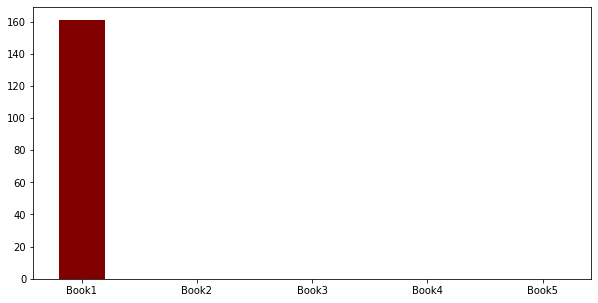

In [72]:
fig = plt.figure(figsize = (10, 5))
values = [len(incorrect_class0),len(incorrect_class1),len(incorrect_class2),len(incorrect_class3),len(incorrect_class4)]
cat = ['Book1', 'Book2', 'Book3','Book4', 'Book5']
# creating the bar plot
plt.bar(cat, values, color ='maroon', width = 0.4)

In [73]:
pred=pd.DataFrame(model_pred)
all =  pred.value_counts()
all 

0    200
dtype: int64

In [74]:
y_test.unique()

array([0, 3, 2, 4, 1])

In [75]:
asd=pd.DataFrame(model_pred)

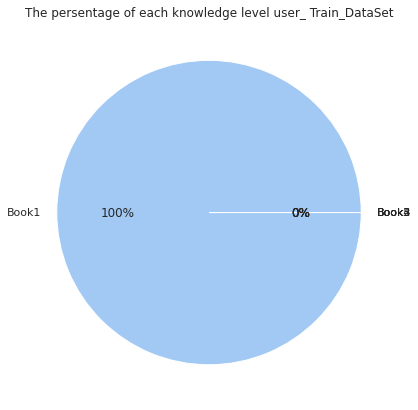

In [76]:
import seaborn as sns

data = values
keys = ['Book1', 'Book2', 'Book3','Book4', 'Book5']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#Change the graph size
sns.set(rc={"figure.figsize":(7, 7)}) 

plt.title("The persentage of each knowledge level user_ Train_DataSet")
#create pie chart
plt.pie(data, labels = keys, colors = colors, autopct='%.0f%%')
plt.show()

### Calculate and Plot and Confusion matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Support Vector Machine BOW approach Confusion Matrix')

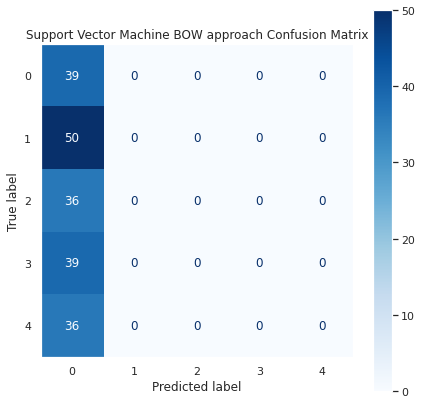

In [77]:
asd_plot3_non=plot_confusion_matrix(models[0], X_test_bow_emb.toarray(), y_test, cmap=plt.cm.Blues)  
plt.grid(False)
plt.title("Support Vector Machine BOW approach Confusion Matrix")

### Plot Pie chart of postive and negative 

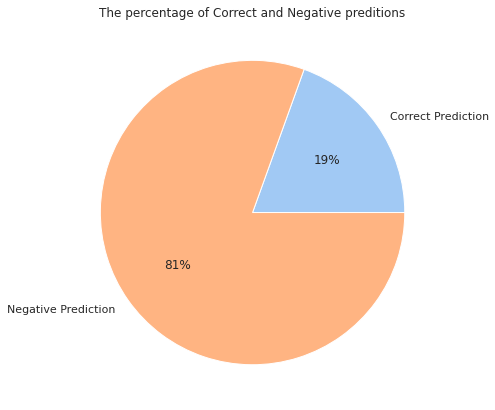

In [78]:
asd_values_01=confusion_matrix(y_test, model_pred)
a=0
b=0
for i in range (len(asd_values_01)):
  for j in range (len(asd_values_01)):
    if i==j:
      a+=asd_values_01[i][j]
    else:
      b+=asd_values_01[i][j]
a_01=a,b
DrawPieChart(a_01)

# Play with features, decress the accuracy

After decided the Champion book, we tried to add some books that does not belong to the same category of the original book, without preprocess its text, and also add some special characters to the original dataset.

In [79]:
a1= "https://www.gutenberg.org/files/12400/12400-h/12400-h.htm"
a2= "https://www.gutenberg.org/files/22089/22089-h/22089-h.htm"

In [80]:
import random 
n = 100 # number of words in the partition
def partitions2(data):
  
  data['patrs'] = data['Text'] 
  data['partt'] = data['patrs']
  for j in range(len(data['Text'] )):
      data['patrs'][j] = [data['patrs'][j][i:i + n] for i in range(0, len(data['patrs'][j]), n)] # create lists of 100 words
      data['partt'][j] = random.choices(data['patrs'][j],k = 200) # create 200 partitions

 
  split_df = pd.DataFrame(data['partt'].values.tolist())
  # split_df.set_index(data['Title'], inplace = True)
  # split_df= split_df.T
  split_df['Title'] = data['Title']
  return split_df

In [81]:
b2 = get_book([a1,a2])
df2 = to_df(b2)

In [82]:
df2= partitions2(df2)

df2 = df2.melt(id_vars=["Title"])
df2 = df2.drop(labels='variable', axis=1)

In [83]:
df2

Title  \
0    The Project Gutenberg eBook of Bismarck, by Ja...   
1    \r\n      The Project Gutenberg eBook of The L...   
2    The Project Gutenberg eBook of Bismarck, by Ja...   
3    \r\n      The Project Gutenberg eBook of The L...   
4    The Project Gutenberg eBook of Bismarck, by Ja...   
..                                                 ...   
395  \r\n      The Project Gutenberg eBook of The L...   
396  The Project Gutenberg eBook of Bismarck, by Ja...   
397  \r\n      The Project Gutenberg eBook of The L...   
398  The Project Gutenberg eBook of Bismarck, by Ja...   
399  \r\n      The Project Gutenberg eBook of The L...   

                                                 value  
0    t remember that all the time when he was defen...  
1    lumns encircle its wall,\r\nThrow open its gat...  
2     UNITED STATES. Edward Earle Sparks. Two vols....  
3     roll,\r\nThen let him forge the fetters\nTo c...  
4     the same time. If one failed him he could tak...  
..                                                 ...  
395   love,\nDivinely bestowed upon some,\r\nAre bl...  
396  r, and Gerlach, who had served him so faithful...  
397   his eye,\r\nWhich won my love, I knew not why...  
398   in order to meet the coarseness of our\r\n   ...  
399  one,\r\nShe hears in her anguish his piteous m...  

[400 rows x 2 columns]

In [84]:
label_encoder =LabelEncoder()
df2['Title']= label_encoder.fit_transform(df2['Title'])
df2.head(10)

Title                                              value
0      1  t remember that all the time when he was defen...
1      0  lumns encircle its wall,\r\nThrow open its gat...
2      1   UNITED STATES. Edward Earle Sparks. Two vols....
3      0   roll,\r\nThen let him forge the fetters\nTo c...
4      1   the same time. If one failed him he could tak...
5      0  \r\nAm I not a sister, say?\nThough I have bee...
6      1  ove the previous question. He denied to the As...
7      0   patient faith the prize is sure,\r\nFor all w...
8      1      have been fairly satisfied with what had b...
9      0  r,\nAnd they thought that I was base;\r\nThey ...

In [85]:
df1 = booksPartions_DataFrame.drop(['Author'], axis = 1)

In [86]:
df1["value"] = "@#$" + str(df1["value"])

In [87]:
big_df = pd.concat([df1, df2], ignore_index=True)

In [88]:
X, y = big_df['value'].astype(str), big_df['Title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
X_train_bow_emb, count_vectorizer = bow_emb(X_train)
X_test_bow_emb = count_vectorizer.transform(X_test)

In [90]:
modelSVC = SVC()
modelSVC.fit(X_train_bow_emb.toarray(), y_train)
print("Accuracy for Training:",modelSVC.score(X_train_bow_emb.toarray(), y_train))
print("Accuracy for Testing:",modelSVC.score(X_test_bow_emb.toarray(), y_test))

Accuracy for Training: 0.43214285714285716
Accuracy for Testing: 0.26785714285714285


In [91]:
pred_values = modelSVC.predict(X_test_bow_emb.toarray())
acc_score=[]
acc = accuracy_score(pred_values , y_test)
acc_score.append(acc)
Variance = np.var(pred_values) # Where Prediction is a vector variable obtained post the # predict() function of any Classifier.
SSE = np.mean((np.mean(pred_values) - y_test)** 2) # Where Y is your dependent variable. # SSE : Sum of squared errors.
Bias = SSE - Variance 

In [92]:
print('Bais : {:.2f}'.format(Bias))
print('Variance: {:.2f}\n'.format(Variance))

Bais : 1.82
Variance: 0.22



### We Notice that Accuracy is very low when we add special characters and garbage data .

## Data Augmenation with Reinforcement Learning 
### TextRL 

*   TextRL is Text generation Library with reinforcement learning using huggingface's transformer.



In [102]:
pip install textrl

Note: you may need to restart the kernel to use updated packages.


### we clone to the files in this github link which include library that we used to generate tests

In [123]:
!pip install pfrl@git+https://github.com/voidful/pfrl.git
!pip install textrl

  Cloning https://github.com/voidful/pfrl.git to /tmp/pip-install-gtjybkv6/pfrl_ce1ed84fb7a34aaba3c03aa94b964e9b
  Running command git clone --filter=blob:none --quiet https://github.com/voidful/pfrl.git /tmp/pip-install-gtjybkv6/pfrl_ce1ed84fb7a34aaba3c03aa94b964e9b
  Resolved https://github.com/voidful/pfrl.git to commit 2ad3d51a7a971f3fe7f2711f024be11642990d61
  Preparing metadata (setup.py) ... done
  Created wheel for pfrl: filename=pfrl-0.3.0-py3-none-any.whl size=155361 sha256=bc56329684b3ced69e21d285771dbc29d1ddb43c77b6193ff1fff14a108f1c50
  Stored in directory: /tmp/pip-ephem-wheel-cache-1wp_xbdp/wheels/ca/23/41/8b371fb69b5d15bf9ecb5249869bba46bb4f66bc1d4954c761
Successfully built pfrl


In [111]:
!git clone https://github.com/voidful/TextRL.git

Cloning into 'TextRL'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 129 (delta 80), reused 85 (delta 40), pack-reused 0
Receiving objects: 100% (129/129), 19.13 KiB | 9.56 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [112]:
cd 'TextRL'

/root/TextRL


In [105]:
pip install -e .

Obtaining file:///kaggle/working/TextRL/TextRL
  Preparing metadata (setup.py) ... done
  Attempting uninstall: textrl
    Found existing installation: textrl 0.1.6
    Uninstalling textrl-0.1.6:
      Successfully uninstalled textrl-0.1.6
  Running setup.py develop for textrl
Note: you may need to restart the kernel to use updated packages.


### Example
Controllable generation via RL to let Elon Musk speak ill of DOGE



*   before: i think dogecoin is a great idea.
*   after: i think dogecoin is a great idea, but I think it is a little overused.




setup reward function for environment


*   predicted(list[str]): will be the list of predicted token
*   finish(bool): it met the end of sentence or not



predicted(list[str]): will be the list of predicted token
finish(bool): it met the end of sentence or not

In [134]:
from textrl import TextRLEnv, TextRLActor

from transformers import AutoTokenizer, AutoModelWithLMHead
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelWithLMHead.from_pretrained("gpt2")
model.eval()



Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/transformers/models/auto/modeling_auto.py:973: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [135]:
class MyRLEnv(TextRLEnv):
    def get_reward(self, input_text, predicted_list, finish):
      print(predicted_list)
      if "dinner" in predicted_list:
        reward = -1
      else:
        reward = 1
      return reward

In [136]:
env = MyRLEnv(model, tokenizer, observation_input=observaton_list)
actor = TextRLActor(env,model,tokenizer)
agent = actor.agent_ppo(update_interval=10, minibatch_size=2000, epochs=10)

In [137]:
observaton_list=["I ate dinner",
"We had a three-course meal",
"Brad came to dinner with us",
"He loves fish tacos",
"In the end, we all felt like we ate too much",
"We all agreed; it was a magnificent evening",
"I hope that, when I’ve built up my savings, I’ll be able to travel to Mexico",
"Did you know that, along with gorgeous architecture, it’s home to the largest tamale?",
"Wouldn’t it be lovely to enjoy a week soaking up the culture?",
"Oh, how I’d love to go!",
"Of all the places to travel, Mexico is at the top of my list.",
"Would you like to travel with me?",
"Isn’t language learning fun?",
"There is so much to understand.",
"I love learning!",
"Sentences come in many shapes and sizes.",
"Nothing beats a complete sentence.",
"Once you know all the elements, it’s not difficult to pull together a sentence."]

### Train

### prepare for training
*   observation_input should be a list of all possible input string for model 



In [138]:
n_episodes = 50
max_episode_len = 200 # max sentence length

for i in range(1, n_episodes + 1):
    obs = env.reset()
    R = 0 
    t = 0 
    i=0
    while i<100:
        action = agent.act(obs)
        obs, reward, done, pred = env.step(action)
        R += reward
        t += 1
        reset = t == max_episode_len
        agent.observe(obs, reward, done, reset)
        if done or reset:
            break
        i+=1
    if i % 10 == 0:
        print('episode:', i, 'R:', R)
    if i % 50 == 0:
        print('statistics:', agent.get_statistics())
print('Finished.')

Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.']
['.', 'C']
['.', 'C', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ']
['.', 'C', '.', 'Ċ', 'Ċ']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa']


/root/TextRL/textrl/actor.py:69: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:2314.)
  (prob_ratio.T * advs).T,
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5', '.', 'ĠThe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5', '.', 'ĠThe', 'Ġ"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5', '.', 'ĠThe', 'Ġ"', 'Open']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', 'The', 'Ġfollowing', 'Ġis', 'Ġa', 'Ġlist', 'Ġof', 'Ġthe', 'Ġmost', 'Ġcommon', 'Ġand', 'Ġmost', 'Ġcommon', 'Ġerrors', 'Ġthat', 'Ġcan', 'Ġoccur', 'Ġwhen', 'Ġyou', 'Ġtry', 'Ġto', 'Ġuse', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġbutton', 'Ġin', 'Ġthe', 'Ġ"', 'Open', '"', 'Ġmenu', '.', 'Ċ', 'Ċ', 'Ċ', '1', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '2', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '3', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '4', '.', 'ĠThe', 'Ġ"', 'Open', '"', 'Ġmenu', 'Ġdoes', 'Ġnot', 'Ġopen', '.', 'ĊĊ', 'Ċ', '5', '.', 'ĠThe', 'Ġ"', 'Open', '"']


Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 4.8420863), ('average_entropy', 0.0924665), ('average_value_loss', 73.17921562194825), ('average_policy_loss', -7.641554383042148e-07), ('n_updates', 10), ('explained_variance', -4.9654834048490475)]
['.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C']
['.', 'C', '.']
['.', 'C', '.', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m"]
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe']
['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons']


Using sep_token, but it is not set yet.


['.', 'C', '.', 'Ċ', 'Ċ', 'Ċ', '"', 'I', "'m", 'Ġnot', 'Ġsure', 'Ġif', 'Ġyou', "'re", 'Ġaware', 'Ġof', 'Ġthe', 'Ġfact', 'Ġthat', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', '."', 'Ċ', 'Ċ', 'Ċ', '"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor', 'Ġthe', 'Ġlast', 'Ġtwo', 'Ġyears', ',"', 'Ġhe', 'Ġsaid', '.', 'Ġ"', 'I', 'Ġthink', 'Ġthe', 'ĠFBI', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġthe', 'Ġbusiness', 'Ġof', 'Ġinvestigating', 'Ġthe', 'ĠClintons', 'Ġfor']


Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 5.5525813), ('average_entropy', 0.081039935), ('average_value_loss', 72.35370178222657), ('average_policy_loss', 4.700160235326934e-06), ('n_updates', 20), ('explained_variance', -6.285911054627206)]
['.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S']
['.', 'S', '.']
['.', 'S', '.', 'C']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.']
['.', 'S', '.', 'C', '.', 'E']
['.', 'S', '.', 'C', '.', 'E', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14']
['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠB']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠB', 'oke']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'C', '.', 'E', '.', 'C', '.', 'E', '.', 'D', '.', 'E', '.', 'M', '.', 'A', '.', 'N', '.', 'T', '.', 'R', '.', 'O', '.', 'L', '.', 'N', '.', 'T', '.', 'R', '.', 'E', '.', 'V', '.', 'AN', '.', 'F', '.', 'Ġ-', 'ĠUltimate', 'ĠEdition', 'Ġ-', 'Ġ25', '60', 'x', '14', '40', 'Ġ-', 'ĠUltra', 'ĠQuality', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠAA', 'Ġ-', 'ĠVery', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠMed', '.', 'ĠShadows', 'Ġ-', 'Ġ4', 'K', 'ĠUltra', 'ĠHD', 'Ġ-', 'ĠHigh', 'ĠQuality', 'Ġ+', 'ĠHigh', 'ĠB', 'oke', 'h']


Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 5.6094956), ('average_entropy', 0.08632417), ('average_value_loss', 63.041368675231936), ('average_policy_loss', 4.582055680598292e-06), ('n_updates', 30), ('explained_variance', -1.5525820529938237)]
['.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S']
['.', 'S', '.']
['.', 'S', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.']
['.', 'S', '.', 'S', '.', 'R']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided']
['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand', 'Ġsource']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand', 'Ġsource', 'Ġare']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand', 'Ġsource', 'Ġare', 'Ġcredited']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand', 'Ġsource', 'Ġare', 'Ġcredited', '.)']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'S', '.', 'R', '.', 'S', '.', 'S', '.', 'T', '.', 'O', '.', 'R', '.', 'Ġ(', 'This', 'Ġis', 'Ġan', 'ĠOpen', 'ĠAccess', 'Ġarticle', 'Ġdistributed', 'Ġunder', 'Ġthe', 'Ġterms', 'Ġof', 'Ġthe', 'ĠCreative', 'ĠCommons', 'ĠAttribution', 'ĠLicense', ',', 'Ġwhich', 'Ġpermits', 'Ġunrestricted', 'Ġuse', ',', 'Ġdistribution', ',', 'Ġand', 'Ġreproduction', 'Ġin', 'Ġany', 'Ġmedium', ',', 'Ġprovided', 'Ġthe', 'Ġoriginal', 'Ġauthor', 'Ġand', 'Ġsource', 'Ġare', 'Ġcredited', '.)']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.']
['.', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s"]
['.', 'ĠBush', "'s", 'Ġfirst']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġwas', 'Ġmarked', 'Ġby', 'Ġa', 'Ġseries', 'Ġof', 'Ġscandals', 'Ġand', 'Ġscandals', 'Ġthat', 'Ġhave', 'Ġleft', 'Ġmany', 'ĠAmericans', 'Ġwondering', 'Ġif', 'Ġthe', 'Ġpresident', 'Ġhas', 'Ġbeen', 'Ġdoing', 'Ġthe', 'Ġright', 'Ġthing', 'Ġin', 'Ġhis', 'Ġfirst', 'Ġterm', '.', 'Ċ', 'Ċ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI', '.', 'ĊĊ', 'Ċ', 'In', 'Ġthe', 'Ġfirst', 'Ġfew', 'Ġmonths', 'Ġof', 'Ġhis', 'Ġpresidency', ',', 'ĠBush', 'Ġhas', 'Ġbeen', 'Ġaccused', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠRussian', 'Ġgovernment', 'Ġand', 'Ġof', 'Ġbeing', 'Ġtoo', 'Ġcozy', 'Ġwith', 'Ġthe', 'ĠFBI']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 6.461522), ('average_entropy', 0.09714583), ('average_value_loss', 64.22630712721083), ('average_policy_loss', 4.1057640955127146e-06), ('n_updates', 45), ('explained_variance', -2.658135985772024)]
['.']
['.', 'I']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.']
['.', 'I', '.', 'S']
['.', 'I', '.', 'S', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O']
['.', 'I', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']
['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.']


Using sep_token, but it is not set yet.


['.', 'I', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S', '.', 'O', '.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 7.2738843), ('average_entropy', 0.08434929), ('average_value_loss', 67.43403611616655), ('average_policy_loss', 5.665070593323259e-06), ('n_updates', 55), ('explained_variance', 0.03767978802725058)]
['.']
['.', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s"]
['.', 'ĠBush', "'s", 'Ġfirst']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 

Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s"]


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġin', 'Ġoffice', 'Ġin', 'Ġ2001', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', 'Ġand', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush', 'Ġadministration', "'s", 'Ġforeign', 'Ġpolicy', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġan', 'Ġoutspoken', 'Ġcritic', 'Ġof', 'Ġthe', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 7.9479084), ('average_entropy', 0.07596469), ('average_value_loss', 76.04630795992338), ('average_policy_loss', 4.2794926206273916e-06), ('n_updates', 65), ('explained_variance', -0.4010280851572823)]
['.']
['.', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s"]
['.', 'ĠBush', "'s", 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin', 'Ġ2004', 'Ġwhen', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'Ġan', 'Ġupset', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 8.545503), ('average_entropy', 0.068076275), ('average_value_loss', 78.20805039087931), ('average_policy_loss', 3.92294263737399e-06), ('n_updates', 75), ('explained_variance', -3.8840983130107363)]
['.']
['.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.']
['.', 'S', '.', 'A']
['.', 'S', '.', 'A', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.']
['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s"]


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s"]


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s"]


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'the', 'Ġ"', 'F', '.', 'A', '.', 'Q', '.")', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ20', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġcharge', 'Ġof', 'Ġthe', 'ĠCIA', "'s", 'Ġcounter', 'intelligence', 'Ġoperations', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 8.764629), ('average_entropy', 0.06704669), ('average_value_loss', 84.86859757479499), ('average_policy_loss', 3.113139484591537e-06), ('n_updates', 85), ('explained_variance', -8.882483677243819)]
['.']
['.', 'ĠBush']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s"]
['.', 'ĠBush', "'s", 'Ġfirst']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan']
['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice']


Using sep_token, but it is not set yet.


['.', 'ĠBush', "'s", 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2002', 'Ġand', 'Ġhis', 'Ġfirst', 'Ġterm', 'Ġended', 'Ġin', 'ĠJanuary', 'Ġ2003', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', 'Ġand', 'Ġhas', 'Ġserved', 'Ġfor', 'Ġmore', 'Ġthan', 'Ġ10', 'Ġyears', '.', 'ĠHe', 'Ġhas', 'Ġbeen', 'Ġin', 'Ġoffice', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 9.38848), ('average_entropy', 0.06497887), ('average_value_loss', 94.05012765683625), ('average_policy_loss', 2.5997865300050734e-06), ('n_updates', 95), ('explained_variance', -3.966651472262985)]
['.']
['.', 'S']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.']
['.', 'S', '.', 'A']
['.', 'S', '.', 'A', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen']
['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s"]


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s"]


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġfor', 'ĠPresident']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġfor', 'ĠPresident', 'ĠTrump']


Using sep_token, but it is not set yet.


['.', 'S', '.', 'A', '.', 'Ġ(', 'The', 'ĠWhite', 'ĠHouse', ')', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġto', 'Ġget', 'ĠPresident', 'ĠTrump', "'s", 'Ġfirst', 'Ġtransgender', 'Ġpresident', 'Ġelected', '.', 'ĠBut', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġmoves', 'Ġhas', 'Ġbeen', 'Ġto', 'Ġget', 'Ġhis', 'Ġfirst', 'Ġpresident', 'Ġelected', 'Ġby', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġstates', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġthe', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠThis', 'Ġhas', 'Ġbeen', 'Ġone', 'Ġof', 'Ġhis', 'Ġfirst', 'Ġbig', 'Ġsteps', 'Ġfor', 'ĠTrump', "'s", 'Ġfirst', 'Ġterm', '.', 'ĠPhoto', ':', 'ĠAP', 'Ċ', 'Ċ', 'Ċ', 'The', 'ĠWhite', 'ĠHouse', 'Ġhas', 'Ġbeen', 'Ġworking', 'Ġfor', 'Ġmonths', 'Ġfor', 'ĠPresident', 'ĠTrump', "'s"]


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 10.070892), ('average_entropy', 0.06518434), ('average_value_loss', 97.92521988391876), ('average_policy_loss', 2.361191591854217e-06), ('n_updates', 105), ('explained_variance', -6.780060826997792)]
['.']
['.', 'ĠS']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.']
['.', 'ĠS', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠS', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 11.336398), ('average_entropy', 0.059528627), ('average_value_loss', 108.97259033679963), ('average_policy_loss', 1.5539777650863673e-06), ('n_updates', 115), ('explained_variance', 0.029259951897318115)]
['.']
['.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']
['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.


['.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', '.', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC', 'ĠC']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 11.590281), ('average_entropy', 0.05709034), ('average_value_loss', 117.65950356006623), ('average_policy_loss', 1.1773490908473238e-06), ('n_updates', 125), ('explained_variance', 0.271851082770902)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 13.14176), ('average_entropy', 0.048925675), ('average_value_loss', 123.00464151859283), ('average_policy_loss', 1.9302058962578084e-06), ('n_updates', 135), ('explained_variance', -0.0373099206957197)]
['.']
['.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.']
['.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 14.800198), ('average_entropy', 0.03623523), ('average_value_loss', 128.84935180187225), ('average_policy_loss', 7.792461173405929e-07), ('n_updates', 145), ('explained_variance', -0.058265095835421166)]
['.']
['.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.']
['.', 'U', '.', 'F']
['.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U']
['.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 16.53215), ('average_entropy', 0.034487464), ('average_value_loss', 139.52572635173797), ('average_policy_loss', -3.773951927832364e-07), ('n_updates', 155), ('explained_variance', -0.04366852016465139)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 18.541763), ('average_entropy', 0.031675275), ('average_value_loss', 143.3866982793808), ('average_policy_loss', -4.387738471001157e-08), ('n_updates', 165), ('explained_variance', -0.047775728278511176)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', 'F', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 20.525208), ('average_entropy', 0.031728115), ('average_value_loss', 164.8465550708771), ('average_policy_loss', -1.764625640676698e-07), ('n_updates', 175), ('explained_variance', -0.0037148000813569393)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 23.309767), ('average_entropy', 0.026698006), ('average_value_loss', 171.8972746181488), ('average_policy_loss', 1.9158780096617533e-07), ('n_updates', 185), ('explained_variance', -0.045741603120784013)]
['.']
['.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.']
['.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']
['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 26.17286), ('average_entropy', 0.023178006), ('average_value_loss', 180.30558457374573), ('average_policy_loss', -1.2797123987073889e-06), ('n_updates', 195), ('explained_variance', -0.08071724454999307)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 29.200583), ('average_entropy', 0.011502083), ('average_value_loss', 195.71247334480285), ('average_policy_loss', -1.1043066657667743e-06), ('n_updates', 205), ('explained_variance', -0.04354408585156011)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 32.18667), ('average_entropy', 0.010751923), ('average_value_loss', 201.26449419975282), ('average_policy_loss', -1.2900013618832863e-06), ('n_updates', 215), ('explained_variance', -0.05217848809197845)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 36.942078), ('average_entropy', 0.005739807), ('average_value_loss', 213.40006989479065), ('average_policy_loss', -1.407331917381016e-06), ('n_updates', 225), ('explained_variance', -0.022817529435692707)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 40.60439), ('average_entropy', 0.005688777), ('average_value_loss', 233.80740632057189), ('average_policy_loss', -1.4012462831022865e-06), ('n_updates', 235), ('explained_variance', -0.014093766014698472)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']
['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U', '.', 'F', '.', 'U']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 43.911713), ('average_entropy', 0.006889534), ('average_value_loss', 255.71261470794678), ('average_policy_loss', -1.1530954499913705e-06), ('n_updates', 245), ('explained_variance', -0.06058879466452205)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 47.64964), ('average_entropy', 0.006065673), ('average_value_loss', 272.5277845954895), ('average_policy_loss', -1.263931483200531e-06), ('n_updates', 255), ('explained_variance', -0.0035579647349588406)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 51.391853), ('average_entropy', 0.005960618), ('average_value_loss', 295.0005279159546), ('average_policy_loss', -1.262453287969867e-06), ('n_updates', 265), ('explained_variance', 0.003011858132808909)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 55.272713), ('average_entropy', 0.0042956877), ('average_value_loss', 322.6783547592163), ('average_policy_loss', -1.2901354702013478e-06), ('n_updates', 275), ('explained_variance', 0.00666005386484092)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 59.145943), ('average_entropy', 0.0034015817), ('average_value_loss', 347.8049329376221), ('average_policy_loss', -1.3642192766674667e-06), ('n_updates', 285), ('explained_variance', 0.011327376930946209)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 62.804466), ('average_entropy', 0.0021981865), ('average_value_loss', 370.7659048080444), ('average_policy_loss', 2.833879083932733e-07), ('n_updates', 295), ('explained_variance', 0.020381580665989718)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 66.64023), ('average_entropy', 0.0017263262), ('average_value_loss', 396.28843391418457), ('average_policy_loss', 2.634739957688148e-07), ('n_updates', 305), ('explained_variance', 0.023428736592600474)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 70.596954), ('average_entropy', 0.0014894481), ('average_value_loss', 427.7809757232666), ('average_policy_loss', 2.547431069957473e-07), ('n_updates', 315), ('explained_variance', 0.02193912065164616)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 74.30169), ('average_entropy', 0.0014747086), ('average_value_loss', 484.1363702774048), ('average_policy_loss', 2.454888899450225e-07), ('n_updates', 325), ('explained_variance', 0.028434346221937745)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 77.83412), ('average_entropy', 0.0014277626), ('average_value_loss', 526.4821461486816), ('average_policy_loss', 2.411389427915689e-07), ('n_updates', 335), ('explained_variance', 0.027730394487170518)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 81.83085), ('average_entropy', 5.924125e-05), ('average_value_loss', 559.4330973052979), ('average_policy_loss', -8.422136308222638e-09), ('n_updates', 345), ('explained_variance', 0.027030817393255746)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 85.478), ('average_entropy', 5.677253e-05), ('average_value_loss', 596.4984125518799), ('average_policy_loss', -8.586049064923662e-09), ('n_updates', 355), ('explained_variance', 0.027834123372749264)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 89.01827), ('average_entropy', 5.6469362e-05), ('average_value_loss', 634.4630364990235), ('average_policy_loss', -8.936524418107217e-09), ('n_updates', 365), ('explained_variance', 0.02925313285516684)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 92.6793), ('average_entropy', 5.1825096e-05), ('average_value_loss', 656.8483710861206), ('average_policy_loss', -9.441971823703766e-09), ('n_updates', 375), ('explained_variance', 0.028463591712555192)]
['.']
['.', 'Ġmilitary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.']
['.', 'Ġmilitary', '.', 'ĠThis']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']
['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', '

Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor', 'Ġyears']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor', 'Ġyears', '.']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor', 'Ġyears', '.', 'ĠThis']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary']


Using sep_token, but it is not set yet.


['.', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġput', 'Ġmore', 'Ġmilitary', 'Ġpower', 'Ġinto', 'Ġmilitary', 'Ġoperations', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġto', 'Ġmake', 'Ġmilitary', 'Ġoperations', 'Ġmore', 'Ġmilitary', '.', 'ĠThis', 'Ġmilitary', 'Ġhas', 'Ġbeen', 'Ġable', 'Ġfor', 'Ġyears', 'Ġfor', 'Ġyears', '.', 'ĠThis', 'Ġmilitary', 'Ġhas']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 89.41994), ('average_entropy', 0.0032345837), ('average_value_loss', 782.5221126937867), ('average_policy_loss', -3.852766934135665e-07), ('n_updates', 385), ('explained_variance', -228.4369555665627)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 92.5975), ('average_entropy', 0.0032342938), ('average_value_loss', 844.2758011627197), ('average_policy_loss', -2.6647986334990547e-07), ('n_updates', 395), ('explained_variance', 0.025531017994790406)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 95.55878), ('average_entropy', 0.003234247), ('average_value_loss', 880.419520111084), ('average_policy_loss', -2.62640131908215e-07), ('n_updates', 405), ('explained_variance', 0.017615138149791987)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 98.36219), ('average_entropy', 0.0032344856), ('average_value_loss', 915.3772110748291), ('average_policy_loss', -2.618223561433319e-07), ('n_updates', 415), ('explained_variance', 0.014461165671942333)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 100.9154), ('average_entropy', 0.003187494), ('average_value_loss', 929.5909061431885), ('average_policy_loss', -2.5407256025830605e-07), ('n_updates', 425), ('explained_variance', 0.011819260658865738)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 103.55792), ('average_entropy', 0.0031881914), ('average_value_loss', 967.7865719223023), ('average_policy_loss', -2.570134535695434e-07), ('n_updates', 435), ('explained_variance', 0.008238374808746673)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 106.0334), ('average_entropy', 0.003188496), ('average_value_loss', 1000.815225982666), ('average_policy_loss', -2.5830449014496716e-07), ('n_updates', 445), ('explained_variance', 0.007040248323288201)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 108.544136), ('average_entropy', 0.0031884953), ('average_value_loss', 1034.080015449524), ('average_policy_loss', -2.589738504521488e-07), ('n_updates', 455), ('explained_variance', 0.009180074442234565)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 110.69486), ('average_entropy', 0.0032329692), ('average_value_loss', 1113.5772219848632), ('average_policy_loss', -2.5554419896933747e-07), ('n_updates', 465), ('explained_variance', -0.0026629299162463926)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 113.22872), ('average_entropy', 0.003232664), ('average_value_loss', 1147.4274644851685), ('average_policy_loss', -2.5758863838709623e-07), ('n_updates', 475), ('explained_variance', -0.0011740940075481987)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


episode: 100 R: 100
statistics: [('average_value', 122.367645), ('average_entropy', 5.1759645e-05), ('average_value_loss', 1099.9690532302857), ('average_policy_loss', 1.199269342977427e-07), ('n_updates', 485), ('explained_variance', -0.018390854731427986)]
['.']
['.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.']
['.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']
['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.']


Using sep_token, but it is not set yet.


['.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F', '.', 'F']
episode: 100 R: 100
statistics: [('average_value', 124.9372), ('average_entropy', 5.7509424e-05), ('average_value_loss', 1129.2248123550414), ('average_policy_loss', 1.2123585502177291e-09), ('n_updates', 495), ('explained_variance', -0.025644895118576594)]
Finished.


### For prediction


In [139]:
#agent.load("somewhere/best") # loading the best model
actor.predict("dinner")

Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.']
['.', 'ĠThis']
['.', 'ĠThis', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.
Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof']
['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


Using sep_token, but it is not set yet.


['.', 'ĠThis', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġof', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset', 'Ġset']


'. This set of set of set of set of set of set of set of set of set of set of set of set of set of set of set of set of set of set of set set of set of set of set of set set set of set of set of set set set of set of set set set set of set set set set set set set set set set set set set set set set set set set set set set set set set set set set set set set set set set'